# Logistic regression with scikit-learn 📊

Let's come back to our famous toy-dataset and change the objective : we would like to predict if a person will buy a product (variable "Purchased") as a function of the other variables. To do so, we'll train a logistic regression model and evaluate its performances.

## What will you learn in this course? 🧐🧐
This lecture is a follow-along demo that will guide you through the steps of building logistic regressions models and evaluate them on actual data.

* Multivariate logistic regression
    * Training Pipeline
    * Test Pipeline

In [1]:
!pip install plotly -q
!pip install -U kaleido -q
!pip install nbformat -q
!pip install --upgrade scikit-learn -q
# restart kernel after all installations ;) 

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Berenger\\anaconda3\\Lib\\site-packages\\~klearn\\datasets\\_svmlight_format_fast.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg" # to be replaced by "iframe" if working on JULIE

In [3]:
# Import dataset
print("Loading dataset...")
dataset = pd.read_csv("Data.csv")
print("...Done.")
print()

Loading dataset...
...Done.



In [4]:
# Basic stats
print("Number of rows : {}".format(dataset.shape[0]))
print()

print("Display of dataset: ")
display(dataset.head())
print()

print("Basics statistics: ")
data_desc = dataset.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])


Number of rows : 10

Display of dataset: 


,Country,Age,Salary,Purchased
0,France,44.0,72000,No
1,Spain,27.0,48000,Yes
2,Germany,30.0,54000,No
3,Spain,38.0,61000,No
4,Germany,40.0,69000,Yes



Basics statistics: 


,Country,Age,Salary,Purchased
count,10,9.000000,10.000000,10
unique,3,NaN,NaN,2
top,France,NaN,NaN,No
freq,4,NaN,NaN,5
mean,NaN,38.777778,64300.000000,NaN
std,NaN,7.693793,11681.419244,NaN
min,NaN,27.000000,48000.000000,NaN
25%,NaN,35.000000,55000.000000,NaN
50%,NaN,38.000000,64000.000000,NaN
75%,NaN,44.000000,71250.000000,NaN



Percentage of missing values: 


Country       0.0
Age          10.0
Salary        0.0
Purchased     0.0
dtype: float64

## Multivariate logistic regression
Let's train a multivariate model with 3 variables: `Age`, `Country` and `Salary`.

In [5]:
# Separate target variable Y from features X
print("Separating labels from features...")
features_list = ["Country", "Age", "Salary"]
target_variable = "Purchased"

X = dataset.loc[:,features_list]
Y = dataset.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0     No
1    Yes
2     No
3     No
4    Yes
Name: Purchased, dtype: object

X :
   Country   Age  Salary
0   France  44.0   72000
1    Spain  27.0   48000
2  Germany  30.0   54000
3    Spain  38.0   61000
4  Germany  40.0   69000


In [6]:
# Automatically detect positions of numeric/categorical features
idx = 0
numeric_features = []
numeric_indices = []
categorical_features = []
categorical_indices = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
        numeric_indices.append(idx)
    else :
        categorical_features.append(i)
        categorical_indices.append(idx)

    idx = idx + 1

print('Found numeric features ', numeric_features,' at positions ', numeric_indices)
print('Found categorical features ', categorical_features,' at positions ', categorical_indices)

Found numeric features  ['Age', 'Salary']  at positions  [1, 2]
Found categorical features  ['Country']  at positions  [0]


In [7]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
# WARNING : don't forget stratify=Y for classification problems
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify = Y)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



### Training pipeline

In [8]:
# numeric transformation 
numeric_transformer = Pipeline(
    steps=[
        ("num_imputer", SimpleImputer(strategy="mean")),
        ("num_scaler", StandardScaler())
    ]
)

# OHE / dummyfication
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_indices),    
        ('num', numeric_transformer, numeric_indices)
        ]
    )

X_train = preprocessor.fit_transform(X_train)
print("...Done")
print(X_train[0:5,:])

# Label encoding
print("Encoding labels...")
print(Y_train.head())
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
print("...Done")
print(Y_train[0:5])

...Done
[[ 0.00000000e+00  0.00000000e+00  1.61706195e+00  1.46885753e+00]
 [ 1.00000000e+00  0.00000000e+00  8.22715727e-01  1.09777773e+00]
 [ 0.00000000e+00  1.00000000e+00 -1.41104234e-15 -1.00500778e+00]
 [ 0.00000000e+00  0.00000000e+00  2.26956063e-01  8.50391200e-01]
 [ 0.00000000e+00  1.00000000e+00  4.25542617e-01  1.08231607e-01]]
Encoding labels...
0     No
4    Yes
6     No
9    Yes
3     No
Name: Purchased, dtype: object
...Done
[0 1 0 1 0]


In [9]:
# Train model
print("Train model...")
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [10]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 1 0 1 1 1]



### Test pipeline

In [11]:
# Encoding categorical features and standardizing numerical features
print("Encoding categorical features and standardizing numerical features...")
print(X_test.head())
X_test = preprocessor.transform(X_test)
print("...Done")
print(X_test[0:5,:])

# Label encoding
print("Encoding labels...")
print(Y_test[0:5])
Y_test = encoder.transform(Y_test)
print("...Done")
print(Y_test[0:5])

Encoding categorical features and standardizing numerical features...
   Country   Age  Salary
8  Germany  50.0   83000
7   France  48.0   79000
...Done
[[1.         0.         2.80858127 2.82948345]
 [0.         0.         2.41140816 2.33471038]]
Encoding labels...
8     No
7    Yes
Name: Purchased, dtype: object
...Done
[0 1]


In [12]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0]



In [13]:
# Print scores
print("accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))
print()

print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))
print()

accuracy on training set :  0.75
accuracy on test set :  0.5

f1-score on training set :  0.75
f1-score on test set :  0.0



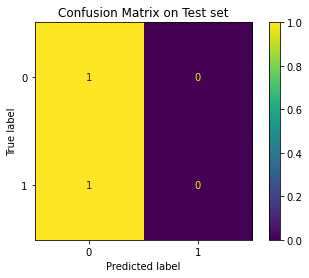

In [14]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, Y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

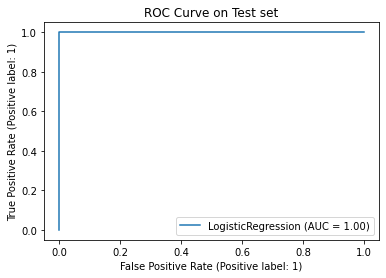

In [15]:
# Visualize ROC curves
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Test set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(classifier, X_test, Y_test, ax=ax) # RocCurveDisplay from sklearn
plt.show()

## Resources 📚📚

* Update sklearn to version 1.0 - [https://bit.ly/2Csascr](https://scikit-learn.org/stable/install.html)
* Metrics and scoring: quantifying the quality of predictions - [https://bit.ly/0CSasrz](https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix)
* ConfusionMatrixDisplay - [https://bit.ly/20SCsss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator)
* RocCurveDisplay - [https://bit.ly/ZCsassZ](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay.from_predictions)